In [1]:
# import the library module for SHA
import sys
import hashlib
import numpy

if sys.version_info < (3, 6):
	import sha3

In [2]:
# initialize a string
x = numpy.random.rand(64)

# create sha3-256 hash objects
obj_sha3_256 = hashlib.sha3_256(x)

# print in hexadecimal
print("\nSHA3-256 Hash 1: ", obj_sha3_256.hexdigest())
x_2 = obj_sha3_256.digest()
x_3 = obj_sha3_256.hexdigest()
#print(x_2)
#obj_sha3_256_2 = hashlib.sha3_256(x_2)
#print("\nSHA3-256 Hash 2: ", obj_sha3_256_2.hexdigest())


SHA3-256 Hash 1:  cb7042d129267ef0783f2401dbcc27403be76262a7a65d53207c824e41283f36


In [3]:
# initialize hex string
ini_string = x_3
scale = 16

# printing initial string
print ("Initial string", ini_string)

# code to convert hex to binary
res = bin(int(ini_string, scale)).zfill(8)

# print the resultant string
print ("Resultant string", str(res))

array_5_bit_values = []

i = 0

while i < 51 : 
  five_bits = res[5*i+2:5*i+7]
  array_5_bit_values.append(five_bits)
  i = i + 1


print(array_5_bit_values)

Initial string cb7042d129267ef0783f2401dbcc27403be76262a7a65d53207c824e41283f36
Resultant string 0b1100101101110000010000101101000100101001001001100111111011110000011110000011111100100100000000011101101111001100001001110100000000111011111001110110001001100010101001111010011001011101010100110010000001111100100000100100111001000001001010000011111100110110
['11001', '01101', '11000', '00100', '00101', '10100', '01001', '01001', '00100', '11001', '11111', '01111', '00000', '11110', '00001', '11111', '00100', '10000', '00000', '11101', '10111', '10011', '00001', '00111', '01000', '00000', '11101', '11110', '01110', '11000', '10011', '00010', '10100', '11110', '10011', '00101', '11010', '10100', '11001', '00000', '01111', '10010', '00001', '00100', '11100', '10000', '01001', '01000', '00111', '11100', '11011']


In [4]:
# input = 

In [5]:
# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, IBMQ, execute
from qiskit.tools.monitor import job_monitor

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

# useful additional packages 
import numpy as np #library for scientific computing

# from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

In [6]:
#setting the quantum circuit
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')

circuit = QuantumCircuit(qreg_q, creg_c)

In [7]:
#loading the bitchain
bitchain = [0,1,1,0,1]
for i in range(len(bitchain)):
    if bitchain[i] == 1:
        circuit.x(qreg_q[i])     

In [8]:
for i in range(len(bitchain)):
    print(i)

0
1
2
3
4


In [9]:
#program the circuit
circuit.h(qreg_q[0])
# circuit.x(qreg_q[1])
# circuit.x(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[3])
circuit.swap(qreg_q[3], qreg_q[4])
circuit.h(qreg_q[4])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])

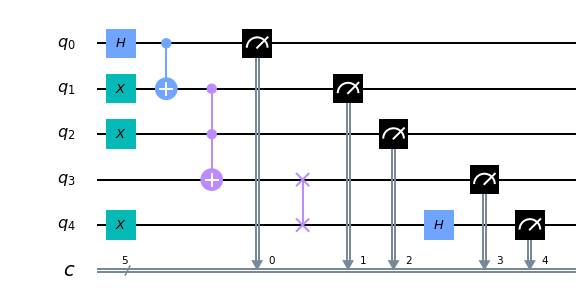

In [10]:
#draw the quantum circuit
circuit.draw(output='mpl')

In [11]:
backend = BasicAer.get_backend('qasm_simulator') # run on local simulator by default 

# Uncomment the following lines to run on a real device
# from qiskit import IBMQ
# from qiskit.providers.ibmq import least_busy

# # Load local account information
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q')
# backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
# print("least busy backend: ", backend)

In [12]:
# run job and result
QPoW_job = execute(circuit, backend)
QPoW_results = QPoW_job.result()
job_monitor(QPoW_job)

Job Status: job has successfully run


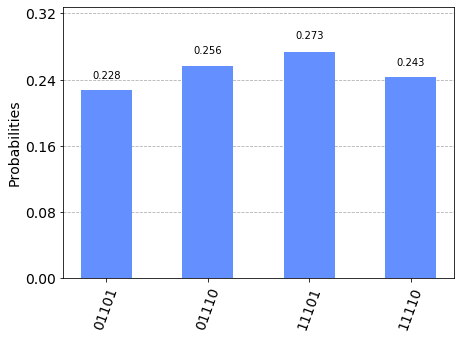

In [13]:
# plot results
plot_histogram(QPoW_results.get_counts(circuit))

In [15]:
output = list(QPoW_results.get_counts(circuit))
output_cat = ''.join(output)

In [16]:
output_cat

'01110111010110111110'

In [17]:
encoded_str = str.encode(output_cat)
obj_sha3_256_3 = hashlib.sha3_256(encoded_str)
print("\nSHA3-256 Hash 3: ", obj_sha3_256_3.hexdigest())


SHA3-256 Hash 3:  da41741eaabd51897291727f2994f01bed50df285644e5524df44f93b0384a7b
